In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Introduction
## The Dataset

The dataset used for this project was obtained from Kaggle's Drug Consumption Classification. This dataset contains records for 1885 respondents, each with 12 attributes.

In [2]:
pd.options.display.max_columns = 32

df = pd.read_csv('drug_consumption.csv')
df.head(10)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987,CL6,CL0,CL0,CL0,CL6,CL1,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,CL5,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,CL4,CL0,CL0,CL0,CL6,CL0,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,0.12331,-1.37983,-0.84637,CL6,CL1,CL0,CL1,CL6,CL1,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


# Preprocessing data

The original dataset doesn´t have any duplicated entry. We remove all drugs except cannabis from the entries and convert the results to more understandable values.

In [3]:
n_rows = df.shape[0]
df = df.drop_duplicates()
n_rows_dup = df.shape[0]

print("Original Dataset: ", n_rows)
print("Dropped ", n_rows - n_rows_dup)

drug_col = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
df = df.drop(columns=drug_col) #Remove all drugs except cannabis


df.head(10)


Original Dataset:  1885
Dropped  0


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Cannabis
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL4
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL3
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL2
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL3
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987,CL1
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,0.12331,-1.37983,-0.84637,CL1


# Cannabis Consumption

| Value |      Description      |
|-------|-----------------------|
|CL0	| Never Used            |
|CL1	|Used over a Decade Ago |
|CL2	| Used in Last Decade   |
|CL3	| Used in Last Year     |
|CL4	| Used in Last Month    |
|CL5	| Used in Last Week     |
|CL6	| Used in Last Day      |

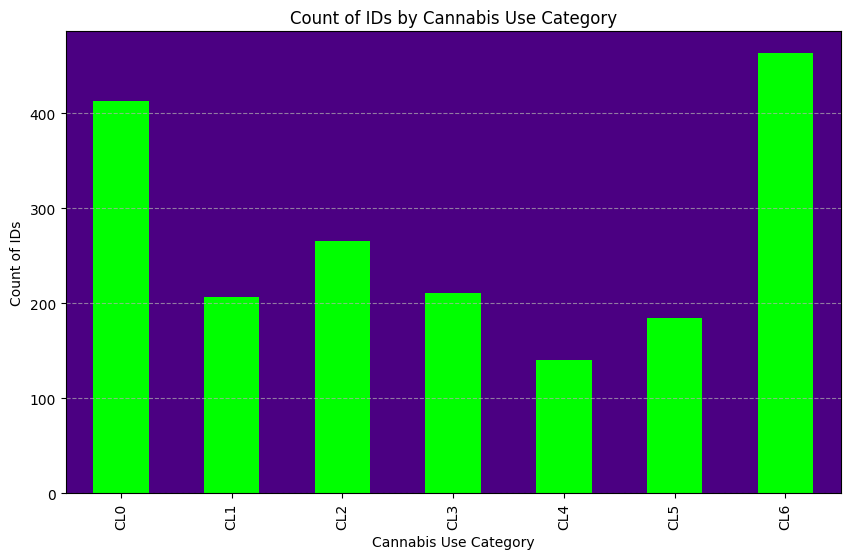

In [4]:
# Group the data by the "Cannabis" column and count the number of IDs in each group
cannabis_counts = df['Cannabis'].value_counts().sort_index()

# Plot a bar chart
plt.figure(figsize=(10, 6))
cannabis_counts.plot(kind='bar', color='#00ff00')
plt.title('Count of IDs by Cannabis Use Category')
plt.xlabel('Cannabis Use Category')
plt.ylabel('Count of IDs')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add shaded background
plt.gca().patch.set_facecolor('#4B0082')  # Set background color to a shade of dark purple

plt.show()

## Correlation between features

<Axes: >

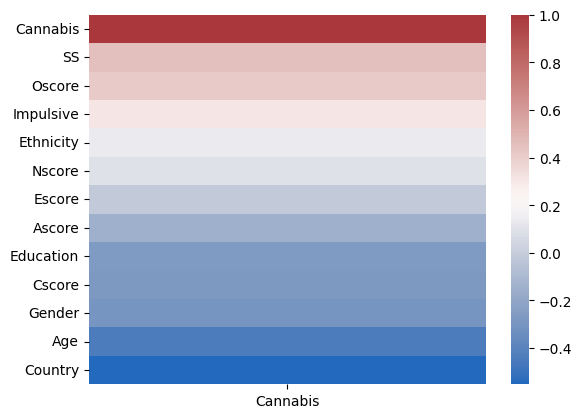

In [5]:
temp = df.copy(deep=True)
pd.set_option('future.no_silent_downcasting', True)
temp['Cannabis'] = temp['Cannabis'].replace({'CL0': 0, 'CL1': 1,'CL2': 2, 'CL3': 3,'CL4': 4, 'CL5': 5,'CL6': 6})
temp = temp.drop(columns=["ID"])

corr = temp.corr()[['Cannabis']].sort_values(by='Cannabis', ascending=False)

sb.heatmap(corr, cmap="vlag")

From this analysis, we perceive that the greater the open-mindedness(`Oscore`) of a person and the better the sensations(`SS`) produced by cannabis, the higher the likelihood of consumption.

# Decision Tree

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Combine classes to simplify the problem
df['Cannabis_Simplified'] = df['Cannabis'].replace({'CL0': 'Never Used', 'CL1': 'Never Used',
                                                     'CL2': 'Used Recently', 'CL3': 'Used Recently',
                                                     'CL4': 'Used Recently', 'CL5': 'Used Recently',
                                                     'CL6': 'Used Recently'})

# Define inputs and target
X = df.drop(columns=['Cannabis', 'Cannabis_Simplified'])
y = df['Cannabis_Simplified']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.7453580901856764


# Neural Network

In [7]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Train the classifier
mlp_clf.fit(X_train, y_train)

# Make predictions
y_pred = mlp_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7639257294429708


# Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.7824933687002652


# Logistic Regression

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Features and target
X = df.drop(columns=['Cannabis', 'Cannabis_Simplified'])
y = df['Cannabis_Simplified']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression(max_iter=10000)

# Train the model
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, predictions))

# Classification report
print(classification_report(y_test, predictions))

Accuracy: 0.8196286472148541
               precision    recall  f1-score   support

   Never Used       0.68      0.77      0.72       114
Used Recently       0.89      0.84      0.87       263

     accuracy                           0.82       377
    macro avg       0.79      0.81      0.79       377
 weighted avg       0.83      0.82      0.82       377



## Best algorithm

From the previous analysis, the highest accuracy algorithm was `Logistic Regression`

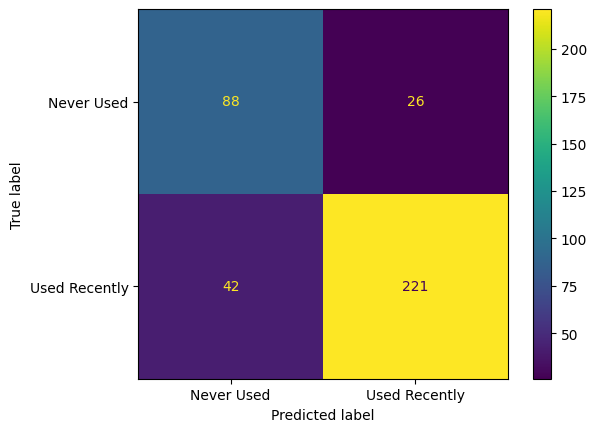

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion = confusion_matrix(y_test, predictions)

ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ["Never Used", "Used Recently"]).plot()

plt.show()